In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))

from UKMovementSensing import hsmm

import pandas as pd
import numpy as np

In [3]:
execfile('config.py')

## Load the data

In [8]:
filenames = os.listdir(subset_path)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(subset_path,fn))]
datasets = [pd.read_csv(os.path.join(subset_path,fn)) for fn in filenames]
print(len(datasets))

11


In [9]:
for i in range(len(datasets)):
    datasets[i] = datasets[i].set_index('timestamp')
    datasets[i].index = pd.to_datetime(datasets[i].index) 

In [10]:
# Take one example datset and have a look
example_index = 2
example_data = datasets[example_index]

example_data.head()

,acceleration,EN,anglex,angley,anglez,roll_med_acc_x,roll_med_acc_y,roll_med_acc_z,dev_roll_med_acc_x,dev_roll_med_acc_y,dev_roll_med_acc_z,invalid,filename,Slot,act,act_label,start_time,subset,switched_pos
timestamp,,,,,,,,,,,,,,,,,,,
2015-03-05 04:00:00,0.003365,0.996340,-65.315964,12.839137,-20.705795,-0.904853,0.221299,-0.352103,-0.001102,0.001002,0.003621,0,__016580_2015-03-12 09-09-15.bin_day1,1,1.0,Sleeping and resting (including sick in bed),2015-03-05 04:00:00+00:00,0,False
2015-03-05 04:00:05,0.003278,0.998538,-62.658269,13.348475,-23.393921,-0.886729,0.230470,-0.396355,0.002263,0.001669,-0.004457,0,__016580_2015-03-12 09-09-15.bin_day1,1,1.0,Sleeping and resting (including sick in bed),2015-03-05 04:00:00+00:00,0,False
2015-03-05 04:00:10,0.002431,0.998578,-62.733459,13.280806,-23.351338,-0.887516,0.229370,-0.395758,-0.000157,-0.000412,-0.000040,0,__016580_2015-03-12 09-09-15.bin_day1,1,1.0,Sleeping and resting (including sick in bed),2015-03-05 04:00:00+00:00,0,False
2015-03-05 04:00:15,0.001929,0.998130,-62.790675,13.155759,-23.364066,-0.887516,0.227132,-0.395758,0.000197,0.000648,-0.000378,0,__016580_2015-03-12 09-09-15.bin_day1,1,1.0,Sleeping and resting (including sick in bed),2015-03-05 04:00:00+00:00,0,False
2015-03-05 04:00:20,0.002238,0.998390,-62.790675,13.155759,-23.364066,-0.887516,0.227132,-0.395758,0.000000,0.000668,-0.000577,0,__016580_2015-03-12 09-09-15.bin_day1,1,1.0,Sleeping and resting (including sick in bed),2015-03-05 04:00:00+00:00,0,False


## Prepare data for HSMM

In [11]:
X_list = [d[column_names].as_matrix() for d in datasets]

## Train HSMM

/home/dafne/anaconda2/envs/ucl2/lib/python2.7/site-packages/pybasicbayes/util/stats.py:185: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x = np.random.randn(nu,n)


0
Resampled 11 sequences in 27.9 seconds
Log likelihood:  132919.212663
Convergence: average Hamming distance is 0.529161405724
1
Resampled 11 sequences in 25.5 seconds
Log likelihood:  306090.068599
Convergence: average Hamming distance is 0.489308712121
2
Resampled 11 sequences in 25.3 seconds
Log likelihood:  355137.5118
Convergence: average Hamming distance is 0.298001893939
3
Resampled 11 sequences in 24.5 seconds
Log likelihood:  382933.724398
Convergence: average Hamming distance is 0.220525042088
4
Resampled 11 sequences in 24.4 seconds
Log likelihood:  403727.054907
Convergence: average Hamming distance is 0.155667087542
5
Resampled 11 sequences in 23.9 seconds
Log likelihood:  419987.2835
Convergence: average Hamming distance is 0.0918360690236
6
Resampled 11 sequences in 23.5 seconds
Log likelihood:  432288.50359
Convergence: average Hamming distance is 0.0728198653199
7
Resampled 11 sequences in 23.2 seconds
Log likelihood:  441295.898008
Convergence: average Hamming distan

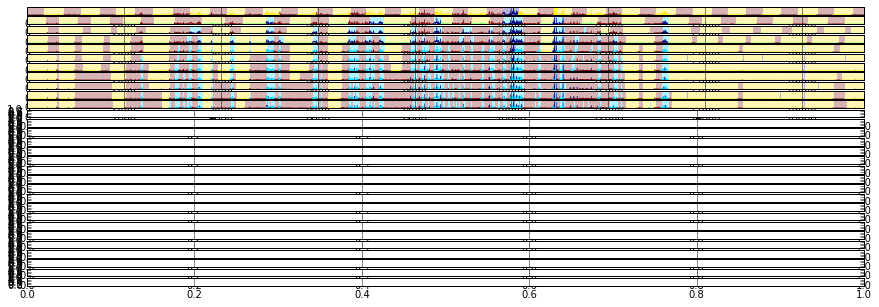

In [12]:
#Note that with many iterations, the visualization becomes badly visible
model, model_dist = hsmm.train_hsmm(X_list, Nmax=Nmax, nr_resamples=nr_resamples, trunc=truncate, visualize=True, example_index=example_index)

## Plot one example

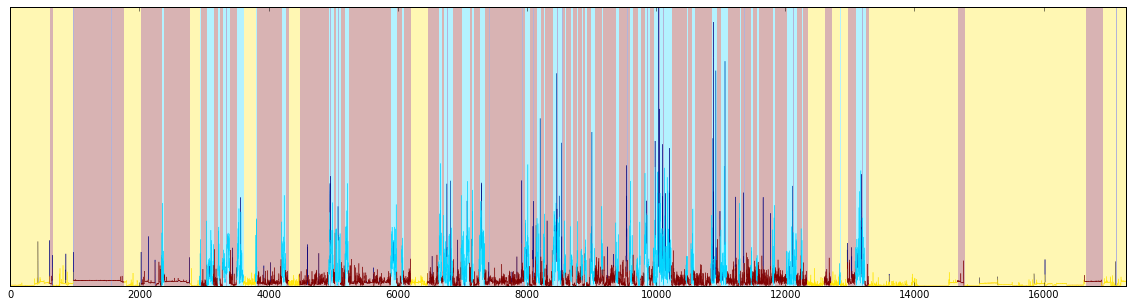

In [13]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20, 5))
model.plot_stateseq(example_index)

## Possibly: Apply the model to new data

In [ ]:
# You can apply this to another list of datasets
for dat in datasets:
    X = dat[column_names].as_matrix()
    prediction = model.predict(X, 0)
    dat['state'] = predictions

## Save the data with the states

Save the data including the states found. This labeled data serves as an input to the analyses.

In [15]:
if not os.path.exists(states_path_model):
        os.makedirs(states_path_model)
for i, dat in enumerate(datasets):
    dat['state'] = model.stateseqs[i]
    fn = str(str(dat['subset'][0]) + dat['filename'][0])+'.csv'
    dat.to_csv(os.path.join(states_path_model, fn))

## Save the model

In [14]:
import pickle
#Remove the data from the model
model.states_list = []

if not os.path.exists(model_path):
        os.makedirs(model_path)
with open(os.path.join(model_path, model_name), 'wb') as f:
    pickle.dump(model, file=f)